In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = "data/parsed_psm/sc_rep5.tsv"
df = pd.read_csv(file_name, sep='\t', index_col=0)
df = df.sort_index()
df = df.set_index(["File Name","scan"]) # Not sure if we need to keep filename in the index. It depends on whether we get unique scans
df = df.rename(columns={"precursor_intenisty": "precursor_intensity"})
df

Matched Ion Series  \
File Name              scan                                                       
D19_15um30cm_SC5-calib 14112  [b2+1, b3+1, b4+1, b5+1, b6+1, b10+1];[y2+1, y...   
                       26732  [y1+1, y2+1, y4+1, y5+1, y6+1, y7+1, y8+1, y9+...   
                       11971  [y1+1, y2+1, y3+1, y4+1, y5+1, y6+1, y7+1, y8+...   
                       13773  [y1+1, y2+1, y3+1, y4+1, y5+1, y6+1, y7+1, y8+...   
                       16447  [y1+1, y2+1, y3+1, y4+1, y5+1, y6+1, y7+1, y8+...   
...                                                                         ...   
                       19022              [y1+1, y4+1, y5+1, y6+1, y7+1, y10+2]   
                       13822           [b3+1];[y6+1, y9+1, y10+1, y11+1, y12+1]   
                       12616              [b2+1];[y2+1, y4+1, y6+1, y7+1, y8+1]   
                       11226             [y1+1, y5+1, y7+1, y9+1, y10+1];[b2+1]   
                       23659              [y1+1, y2+1, y5+1, y6+1, y8+1];[b3+1]   

                                              Matched Ion Mass-To-Charge Ratios  \
File Name              scan                                                       
D19_15um30cm_SC5-calib 14112  [b2+1:200.10295, b3+1:257.12438, b4+1:354.1770...   
                       26732  [y1+1:175.11896, y2+1:274.18715, y4+1:460.2519...   
                       11971  [y1+1:147.11279, y2+1:234.14487, y3+1:348.1879...   
                       13773  [y1+1:147.11271, y2+1:246.18096, y3+1:347.2291...   
                       16447  [y1+1:175.11891, y2+1:246.15591, y3+1:359.2404...   
...                                                                         ...   
                       19022  [y1+1:175.11900, y4+1:514.37129, y5+1:629.3975...   
                       13822  [b3+1:346.11775];[y6+1:731.37946, y9+1:1077.51...   
                       12616  [b2+1:228.13460];[y2+1:304.16150, y4+1:534.215...   
                       11226  [y1+1:147.11298, y5+1:562.28336, y7+1:720.3524...   
                       23659  [y1+1:147.11282, y2+1:260.19690, y5+1:589.3308...   

                                                        Matched Ion Intensities  \
File Name              scan                                                       
D19_15um30cm_SC5-calib 14112  [b2+1:3099, b3+1:1096, b4+1:569, b5+1:545, b6+...   
                       26732  [y1+1:1032, y2+1:1523, y4+1:555, y5+1:3836, y6...   
                       11971  [y1+1:982, y2+1:2498, y3+1:2256, y4+1:5883, y5...   
                       13773  [y1+1:485, y2+1:359, y3+1:813, y4+1:329, y5+1:...   
                       16447  [y1+1:1467, y2+1:1597, y3+1:2155, y4+1:752, y5...   
...                                                                         ...   
                       19022  [y1+1:829, y4+1:877, y5+1:1856, y6+1:2065, y7+...   
                       13822  [b3+1:520];[y6+1:267, y9+1:1096, y10+1:1334, y...   
                       12616  [b2+1:272];[y2+1:818, y4+1:555, y6+1:685, y7+1...   
                       11226  [y1+1:263, y5+1:330, y7+1:2250, y9+1:3238, y10...   
                       23659  [y1+1:497, y2+1:284, y5+1:494, y6+1:467, y8+1:...   

                              Matched Ion Counts    QValue  \
File Name              scan                                  
D19_15um30cm_SC5-calib 14112                  28  0.000000   
                       26732                  26  0.000000   
                       11971                  25  0.000000   
                       13773                  25  0.000000   
                       16447                  24  0.000000   
...                                          ...       ...   
                       19022                   6  0.009988   
                       13822                   6  0.009988   
                       12616                   6  0.009988   
                       11226                   6  0.009988   
                       23659                   6  0.009988   

              

In [3]:
df_series = df.drop(columns=["Matched Ion Intensities","Matched Ion Mass-To-Charge Ratios"])
df_intensities = df[["Matched Ion Intensities"]].copy()
df_mz = df[["Matched Ion Mass-To-Charge Ratios"]].copy()

# Deal with getting the Ion Name, Ion Charge, Ion Number (with respect to the peptide)
df_series["Matched Ion Series"] = df_series["Matched Ion Series"].str.split(";")
df_series = df_series.explode("Matched Ion Series")
df_series["Matched Ion Series"] = df_series["Matched Ion Series"].str.split(", ")
df_series = df_series.explode("Matched Ion Series")
df_series["Matched Ion Series"] = df_series["Matched Ion Series"].str.strip("[]")
df_series = df_series.rename(columns={"Matched Ion Series": "Ion Name"})
df_series[["Ion Type", "Ion Number", "Ion Charge"]] = df_series["Ion Name"].str.extract(r"([abcxyz])(\d{1,3})([+-]\d)") # Tried to handle every possible case here, but this may need to be amended
df_series = df_series.astype({"Ion Charge": int, "Ion Number": int})
df_series = df_series.set_index("Ion Name", append=True)

# Deal with getting the Ion Intensity
df_intensities["Matched Ion Intensities"] = df_intensities["Matched Ion Intensities"].str.split(";")
df_intensities = df_intensities.explode("Matched Ion Intensities")
df_intensities["Matched Ion Intensities"] = df_intensities["Matched Ion Intensities"].str.split(", ")
df_intensities = df_intensities.explode("Matched Ion Intensities")
df_intensities["Matched Ion Intensities"] = df_intensities["Matched Ion Intensities"].str.strip("[]")
df_intensities["Matched Ion Intensities"] = df_intensities["Matched Ion Intensities"].str.split(":")
df_intensities = pd.DataFrame(df_intensities["Matched Ion Intensities"].to_list(), columns=["Ion Name", "Intensity"], index=df_intensities.index)
df_intensities = df_intensities.set_index("Ion Name", append=True)
df_intensities = df_intensities.astype({"Intensity": float})

# Deal with getting the Ion m/z
df_mz["Matched Ion Mass-To-Charge Ratios"] = df_mz["Matched Ion Mass-To-Charge Ratios"].str.split(";")
df_mz = df_mz.explode("Matched Ion Mass-To-Charge Ratios")
df_mz["Matched Ion Mass-To-Charge Ratios"] = df_mz["Matched Ion Mass-To-Charge Ratios"].str.split(", ")
df_mz = df_mz.explode("Matched Ion Mass-To-Charge Ratios")
df_mz["Matched Ion Mass-To-Charge Ratios"] = df_mz["Matched Ion Mass-To-Charge Ratios"].str.strip("[]")
df_mz["Matched Ion Mass-To-Charge Ratios"] = df_mz["Matched Ion Mass-To-Charge Ratios"].str.split(":")
df_mz = pd.DataFrame(df_mz["Matched Ion Mass-To-Charge Ratios"].to_list(), columns=["Ion Name", "Mass-To-Charge Ratio"], index=df_mz.index)
df_mz = df_mz.set_index("Ion Name", append=True)
df_mz = df_mz.astype({"Mass-To-Charge Ratio": float})

df_clean = df_series.join(df_intensities, how="inner")
df_clean = df_clean.join(df_mz, how="inner")

df_clean = df_clean[["Ion Type", "Ion Number", "Ion Charge", "Mass-To-Charge Ratio", "Intensity", "Base Peak Intensity", "mz_array", "intensity_array", "precursor_intensity"]]
df_clean

Ion Type  Ion Number  Ion Charge  \
File Name              scan  Ion Name                                    
D19_15um30cm_SC5-calib 14112 b2+1            b           2           1   
                             b3+1            b           3           1   
                             b4+1            b           4           1   
                             b5+1            b           5           1   
                             b6+1            b           6           1   
...                                        ...         ...         ...   
                       23659 y2+1            y           2           1   
                             y5+1            y           5           1   
                             y6+1            y           6           1   
                             y8+1            y           8           1   
                             b3+1            b           3           1   

                                       Mass-To-Charge Ratio  Intensity  \
File Name              scan  Ion Name                                    
D19_15um30cm_SC5-calib 14112 b2+1                 200.10295     3099.0   
                             b3+1                 257.12438     1096.0   
                             b4+1                 354.17704      569.0   
                             b5+1                 425.21402      545.0   
                             b6+1                 496.25121      890.0   
...                                                     ...        ...   
                       23659 y2+1                 260.19690      284.0   
                             y5+1                 589.33085      494.0   
                             y6+1                 688.39952      467.0   
                             y8+1                 930.53643      566.0   
                             b3+1                 333.08642     1101.0   

                                       Base Peak Intensity  \
File Name              scan  Ion Name                        
D19_15um30cm_SC5-calib 14112 b2+1              3432.428955   
                             b3+1              3432.428955   
                             b4+1              3432.428955   
                             b5+1              3432.428955   
                             b6+1              3432.428955   
...                                                    ...   
                       23659 y2+1              1418.214111   
                             y5+1              1418.214111   
                             y6+1              1418.214111   
                             y8+1              1418.214111   
                             b3+1              1418.214111   

                                                                                mz_array  \
File Name              scan  Ion Name                                                      
D19_15um30cm_SC5-calib 14112 b2+1      [115.0872573852539, 127.08719635009766, 129.10...   
                             b3+1      [115.0872573852539, 127.08719635009766, 129.10...   
                             b4+1      [115.0872573852539, 127.08719635009766, 129.10...   
                             b5+1      [115.0872573852539, 127.08719635009766, 129.10...   
                             b6+1      [115.0872573852539, 127.08719635009766, 129.10...   
...                                                                                  ...   
                       23659 y2+1      [110.07189178466797, 113.07160949707031, 115.0...   
                             y5+1      [110.07189178466797, 113.07160949707031, 115.0...   
                             y6+1      [110.07189178466797, 113.07160949707031, 115.0...   
                             y8+1      [110.07189178466797, 113.07160949707031, 115.0...   
                             b3+1      [110.07189178466797, 113.07160949707031, 115.0...   

                                                                         intensity_array  \
File Name       

In [8]:
df_ch2 = df_clean[df_clean["Ion Charge"] != 1]
df_ch2[df_ch2["Ion Charge"] == 3]

Ion Type  Ion Number  Ion Charge  \
File Name              scan  Ion Name                                    
D19_15um30cm_SC5-calib 9895  y15+3           y          15           3   
                       14278 y16+3           y          16           3   
                       26615 y11+3           y          11           3   
                       16073 y14+3           y          14           3   
                       17867 y15+3           y          15           3   
                       15055 y15+3           y          15           3   
                       17985 y23+3           y          23           3   
                       12157 y15+3           y          15           3   
                       14890 y14+3           y          14           3   
                       9260  y9+3            y           9           3   
                             y10+3           y          10           3   
                       14903 y12+3           y          12           3   
                       18903 y11+3           y          11           3   
                       11789 y16+3           y          16           3   
                       22074 y15+3           y          15           3   
                       13835 y13+3           y          13           3   
                       13895 y9+3            y           9           3   
                       14753 y10+3           y          10           3   
                       16450 y21+3           y          21           3   
                             y22+3           y          22           3   
                       18820 y10+3           y          10           3   
                       10816 y8+3            y           8           3   
                       20355 y11+3           y          11           3   
                       9391  y12+3           y          12           3   
                       14873 y10+3           y          10           3   
                       14999 y10+3           y          10           3   

                                       Mass-To-Charge Ratio  Intensity  \
File Name              scan  Ion Name                                    
D19_15um30cm_SC5-calib 9895  y15+3                498.59887      278.0   
                       14278 y16+3                652.96636      796.0   
                       26615 y11+3                426.58250      433.0   
                       16073 y14+3                496.61505      257.0   
                       17867 y15+3                575.65603      933.0   
                       15055 y15+3                528.60027     1138.0   
                       17985 y23+3                857.41796      666.0   
                       12157 y15+3                512.61939      520.0   
                       14890 y14+3                514.94264      566.0   
                       9260  y9+3                 375.55227      613.0   
                             y10+3                404.56300      354.0   
                       14903 y12+3                419.54843     2167.0   
                       18903 y11+3                459.56582      825.0   
                       11789 y16+3                530.59785      461.0   
                       22074 y15+3                557.63022      446.0   
                       13835 y13+3                466.57038      666.0   
                       13895 y9+3                 346.52957      760.0   
                       14753 y10+3                371.21231      862.0   
                       16450 y21+3                682.69939     6251.0   
                             y22+3                711.71014    10456.0   
                       18820 y10+3                397.53657     1545.0   
                       10816 y8+3                 337.82648      807.0   
                       20355 y11+3                461.56306      259.0   
                       9391  y12+3                420.88619      446.0   
                       14873 y10+3       

In [12]:
df_clean.loc[("D19_15um30cm_SC5-calib",14903), :]

/var/folders/tv/_x3fgl1d6vn057g1wrw17n1h0000gn/T/ipykernel_34522/2881716758.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_clean.loc[("D19_15um30cm_SC5-calib",14903), :]


,Ion Type,Ion Number,Ion Charge,Mass-To-Charge Ratio,Intensity,Base Peak Intensity,mz_array,intensity_array,precursor_intensity
Ion Name,,,,,,,,,
y1+1,y,1,1,147.11304,4820.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y2+1,y,2,1,246.18133,911.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y3+1,y,3,1,333.21366,1447.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y4+1,y,4,1,432.28230,663.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y5+1,y,5,1,533.32958,1983.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y6+1,y,6,1,670.38806,1164.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y7+1,y,7,1,771.43549,558.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y8+1,y,8,1,828.45729,3274.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5
y9+2,y,9,2,480.25281,1287.0,20386.705078,"[110.07186126708984, 112.08770751953125, 113.6...","[2542.46923828125, 362.67108154296875, 221.622...",71322.5


/var/folders/tv/_x3fgl1d6vn057g1wrw17n1h0000gn/T/ipykernel_34522/2619182237.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_one_spectrum = df_clean.loc[tuple(selected_spectrum), :]


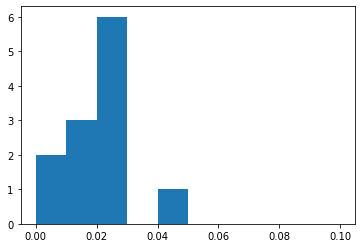

In [91]:
import matplotlib.pyplot as plt
import numpy as np

poss_spectrums = pd.unique([i[:2] for i in df_clean.index])
selected_spectrum = poss_spectrums[np.random.randint(0, len(poss_spectrums))]
df_one_spectrum = df_clean.loc[tuple(selected_spectrum), :]
exec("stupid_list="+df_one_spectrum["intensity_array"][0])
normalizing_constant = np.sum(np.array(stupid_list))
plt.hist(df_one_spectrum["Intensity"]/normalizing_constant, bins=10, range=[0,.1])
#plt.hist(np.array(stupid_list)/df_one_spectrum["Base Peak Intensity"][0], bins=10, alpha=.2)
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_bin_example(xData,yData):
    """
    Args: x array_like object of floats representing data
          y array_like object of floats
          
    expects matplotlib.pyplot and numpy to be imported as plt and np respectively
          
    output: plot
    """
    
    xmin = np.min(xData)
    xmax = np.max(xData)
    ymin = np.min(yData)
    ymax = np.max(yData)
    
    xOffset = xmin
    xRange = xmax - xmin
    yOffset = ymin
    yRange = ymax - ymin
    
    xNormalized = (xData-xOffset)/xRange
    yNormalized = (yData-yOffset)/yRange
    
    #convert data vectors into bins
    xBins = (xNormalized*3).astype(int)
    yBins = (yNormalized*3).astype(int)
    
    #assign colors to bins
    colors = []
    # print(xNormalized,yNormalized)
    for i in range(len(xBins)):
        x = xBins[i]
        y = yBins[i]
        if x == 0:
            if y == 0:
                color = '#77FF70'
            elif y == 1:
                color = '#09B800'
            else:
                color = '#045200'
        elif x == 1:
            if y == 0:
                color = '#FFC870'
            elif y == 1:
                color = '#FF9D00'
            else:
                color = '#8F5800'
        else:
            if y == 0:
                color = '#D085FF'
            elif y == 1:
                color = '#A10AFF'
            else:
                color = '#58008F'
                
        colors.append(color)
        
    #make plot
    plt.vlines(x=xData, ymin=0, ymax=yNormalized*100, linewidth=7)
    # plt.scatter(xData,yData, color=colors, s=1, alpha=1)

    # Create a legend
    plt.ylim(0, 110)



    plt.gcf().set_size_inches(12,9)

    #plt.legend(ncol=3, loc="upper center")
    
    plt.title('Binning Ions in a Mass Spectrum')
    plt.xlabel('Ion Mass-To-Charge Ratio (m/z)')
    plt.ylabel('Ion Intensity (%)')
    
    plt.savefig("binning.pdf")
    plt.show()

/var/folders/y2/wyydcyqx7zl4lhmflcz3r1yr0000gn/T/ipykernel_8655/3708941386.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = df_clean.loc[("D19_15um30cm_SC5-calib", 14112), :] # We choose a random mass spectrum to create the figure.


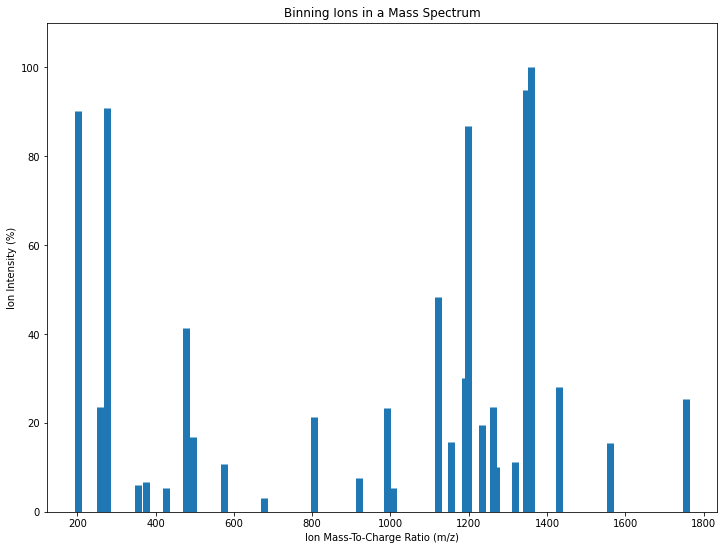

In [42]:
data = df_clean.loc[("D19_15um30cm_SC5-calib", 14112), :] # We choose a random mass spectrum to create the figure.
x = data["Mass-To-Charge Ratio"]
y = data["Intensity"]

plot_bin_example(x,y)

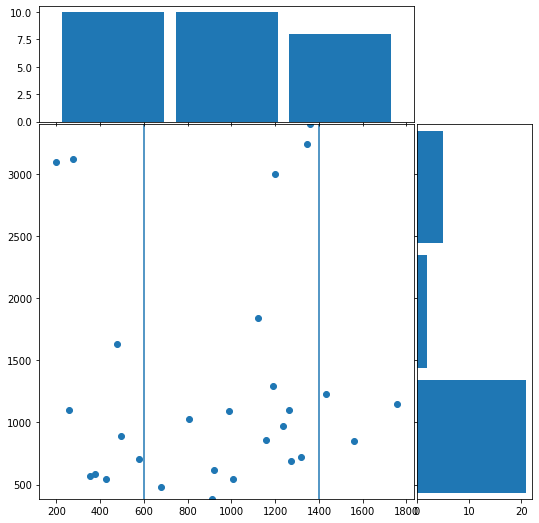

In [26]:
def scatter_hist(xData, yData, ax, ax_histx, ax_histy):
    # no labels
    numBins = 3
    
    xMin = np.min(xData)
    xMax = np.max(xData)
    yMin = np.min(yData)
    yMax = np.max(yData)
    
    xOffset = xMin
    xRange = xMax - xMin
    yOffset = yMin
    yRange = yMax - yMin
    
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(xData, yData)

    # now determine nice limits by hand:
    binWidthY = yRange/3
    binWidthX = xRange/3
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #limX = (int(xymax/binwidth) + 1) * binwidth

    binsY = np.arange(xMin, xMax, binWidthX)
    binsX = np.arange(xMin,xMax, binWidthY)
    ax_histx.hist(xData, bins=3,rwidth = .9)
    ax_histy.hist(yData, bins=3, rwidth = .9, orientation='horizontal')
    ax.vlines([600, 1400],0, 1, transform=ax.get_xaxis_transform())
    ax.set_ylim(yMin,yMax)
    
np.random.seed(19680801)

# some random data
#x = np.random.randn(1000)
#y = np.random.randn(1000)
    
    
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()